In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from bs4 import BeautifulSoup
import requests
from config import key

def get_request(url, parameters ={}):
    return requests.get(url,params = parameters)
url = "https://api.census.gov/data/2018/abstcb"
params = {
    "get":"NAME,NAICS2017,NAICS2017_LABEL,NSFSZFI,NSFSZFI_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,FACTORS_U,FACTORS_U_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP,MOTUSETECH,MOTUSETECH_LABEL,IMPACTWF_U,IMPACTWF_U_LABEL", #specify the variable you want to access
    "for":"state", #specify the geography, what I want to see
    "key": f'{key}'
}

res = get_request(url,params).json()
df = pd.DataFrame(res[1:], columns = res[0])
df.head(10)

,NAME,NAICS2017,NAICS2017_LABEL,NSFSZFI,NSFSZFI_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,FACTORS_U,FACTORS_U_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP,MOTUSETECH,MOTUSETECH_LABEL,IMPACTWF_U,IMPACTWF_U_LABEL,state
0,Alabama,00,Total for all sectors,001,All firms,001,Total,00,Total,00,All firms,T2E03B99,Cloud-Based: Total use,17448,00,All firms,00,All firms,01
1,Alabama,00,Total for all sectors,001,All firms,001,Total,00,Total,00,All firms,T2E03BA9,Cloud-Based: Total Reporting,58136,00,All firms,00,All firms,01
2,Alabama,00,Total for all sectors,001,All firms,001,Total,00,Total,00,All firms,T3E03B01,Specialized Software: Did not use,30912,00,All firms,00,All firms,01
3,Alabama,00,Total for all sectors,001,All firms,001,Total,00,Total,00,All firms,T3E03B02,"Specialized Software: Tested, but did not use ...",253,00,All firms,00,All firms,01
4,Alabama,00,Total for all sectors,001,All firms,001,Total,00,Total,00,All firms,T3E03B03,Specialized Software: Low use,4191,00,All firms,00,All firms,01
5,Alabama,00,Total for all sectors,001,All firms,001,Total,00,Total,00,All firms,T3E03B04,Specialized Software: Moderate use,7449,00,All firms,00,All firms,01
6,Alabama,00,Total for all sectors,001,All firms,001,Total,00,Total,00,All firms,T3E03B05,Specialized Software: High use,10974,00,All firms,00,All firms,01
7,Alabama,00,Total for all sectors,001,All firms,001,Total,00,Total,00,All firms,T3E03B06,Specialized Software: Don't know,4056,00,All firms,00,All firms,01
8,Alabama,00,Total for all sectors,001,All firms,001,Total,00,Total,00,All firms,T3E03B99,Specialized Software: Total use,22612,00,All firms,00,All firms,01
9,Alabama,00,Total for all sectors,001,All firms,001,Total,00,Total,00,All firms,T3E03BA9,Specialized Software: Total Reporting,57832,00,All firms,00,All firms,01


In [2]:
df.shape

(198135, 19)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198135 entries, 0 to 198134
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   NAME              198135 non-null  object
 1   NAICS2017         198135 non-null  object
 2   NAICS2017_LABEL   198135 non-null  object
 3   NSFSZFI           198135 non-null  object
 4   NSFSZFI_LABEL     198135 non-null  object
 5   ETH_GROUP         198135 non-null  object
 6   ETH_GROUP_LABEL   198135 non-null  object
 7   RACE_GROUP        198135 non-null  object
 8   RACE_GROUP_LABEL  198135 non-null  object
 9   FACTORS_U         198135 non-null  object
 10  FACTORS_U_LABEL   198135 non-null  object
 11  TECHUSE           198135 non-null  object
 12  TECHUSE_LABEL     198135 non-null  object
 13  FIRMPDEMP         198135 non-null  object
 14  MOTUSETECH        198135 non-null  object
 15  MOTUSETECH_LABEL  198135 non-null  object
 16  IMPACTWF_U        198135 non-null  obj

In [4]:
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype('int')

In [5]:
total_tech = df[['IMPACTWF_U','IMPACTWF_U_LABEL','FIRMPDEMP','NAME']]
total_tech.tail()

,IMPACTWF_U,IMPACTWF_U_LABEL,FIRMPDEMP,NAME
198130,T4E14D10,"Robotics: Not applicable, did not employ worke...",0,Wyoming
198131,T4E14D99,Robotics: Total Reporting,0,Wyoming
198132,T5E17D01,Specialized Equipment: Increased number of wor...,0,Wyoming
198133,T5E17D02,Specialized Equipment: Decreased number of wor...,0,Wyoming
198134,T5E17D03,Specialized Equipment: Did not change number o...,0,Wyoming


In [6]:
sorted_state = total_tech.sort_values(["FIRMPDEMP"],ascending = False)
sorted_state.head()

,IMPACTWF_U,IMPACTWF_U_LABEL,FIRMPDEMP,NAME
15712,00,All firms,601391,California
15704,00,All firms,601361,California
15677,00,All firms,601214,California
15696,00,All firms,597544,California
15669,00,All firms,597511,California


In [ ]:
use_list = []
use_list = sorted_state['IMPACTWF_U_LABEL'].unique()
#tech_list = total_tech['TECHUSE_LABEL'].unique()
use_list

In [8]:
tech_final_list = [
       'Specialized Software: Did not change number of workers employed by this business',
       'Cloud-Based: Did not change number of workers employed by this business',
       'Specialized Software: Did not change skill level of workers employed by this business',
       'Cloud-Based: Did not change skill level of workers employed by this business',
       'Specialized Software: Not applicable, did not employ workers with STEM skills',
       'Specialized Software: Did not change STEM skills of workers employed by this business',
       'Specialized Equipment: Did not change number of workers employed by this business',
       'Cloud-Based: Not applicable, did not employ workers with STEM skills',
       'Cloud-Based: Did not change STEM skills of workers employed by this business',
       'Specialized Equipment: Did not change skill level of workers employed by this business',
       'Specialized Software: Increased skill level of workers employed by this business',
       'Cloud-Based: Increased skill level of workers employed by this business',
       'Specialized Equipment: Did not change STEM skills of workers employed by this business',
       'Specialized Equipment: Not applicable, did not employ workers with STEM skills',
       'Specialized Software: Increased STEM skills of workers employed by this business',
       'Cloud-Based: Increased STEM skills of workers employed by this business',
       'Specialized Equipment: Increased skill level of workers employed by this business',
       'Cloud-Based: Increased number of workers employed by this business',
       'Specialized Software: Increased number of workers employed by this business',
       'Specialized Equipment: Increased STEM skills of workers employed by this business',
       'Artificial Intelligence: Did not change number of workers employed by this business',
       'Artificial Intelligence: Did not change skill level of workers employed by this business',
       'Specialized Equipment: Increased number of workers employed by this business',
       'Robotics: Did not change number of workers employed by this business',
       'Cloud-Based: Decreased number of workers employed by this business',
       'Artificial Intelligence: Increased skill level of workers employed by this business',
       'Robotics: Did not change skill level of workers employed by this business',
       'Specialized Software: Decreased number of workers employed by this business',
       'Artificial Intelligence: Did not change STEM skills of workers employed by this business',
       'Artificial Intelligence: Increased STEM skills of workers employed by this business',
       'Robotics: Decreased skill level of workers employed by this business',
       'Artificial Intelligence: Decreased skill level of workers employed by this business',
       'Artificial Intelligence: Decreased STEM skills of workers employed by this business',
       'Robotics: Decreased STEM skills of workers employed by this business']

In [ ]:
tech = df[df["IMPACTWF_U_LABEL"].isin(tech_final_list)]

tech_list = []
for i in range(len(tech)):
    tech_list.append(tech.iloc[i,0])

tech.head()

tech_chart = tech.drop(['TECHUSE_LABEL','NAICS2017','NAICS2017_LABEL','NSFSZFI','NSFSZFI_LABEL','ETH_GROUP','ETH_GROUP_LABEL','RACE_GROUP','RACE_GROUP_LABEL','FACTORS_U','FACTORS_U_LABEL','TECHUSE','MOTUSETECH','MOTUSETECH_LABEL'],axis=1)
tech_chart.drop_duplicates(keep=False)
tech_chart.head(20)

In [10]:
tech_top = tech_chart.sort_values(['NAME'],ascending=False) #NAME or IMPACTWF_U

In [204]:
state_grouped = tech_top.groupby(['IMPACTWF_U_LABEL',]).sum()
state_grouped.head(20)

,FIRMPDEMP
IMPACTWF_U_LABEL,
Artificial Intelligence: Decreased STEM skills of workers employed by this business,356
Artificial Intelligence: Decreased skill level of workers employed by this business,891
Artificial Intelligence: Did not change STEM skills of workers employed by this business,107082
Artificial Intelligence: Did not change number of workers employed by this business,223005
Artificial Intelligence: Did not change skill level of workers employed by this business,155781
Artificial Intelligence: Increased STEM skills of workers employed by this business,92467
Artificial Intelligence: Increased skill level of workers employed by this business,115249
Cloud-Based: Decreased number of workers employed by this business,95943
Cloud-Based: Did not change STEM skills of workers employed by this business,1403443


In [205]:
state_top_10 = state_grouped.nlargest(10,columns="FIRMPDEMP")
state_top_10

,FIRMPDEMP
IMPACTWF_U_LABEL,
Specialized Software: Did not change number of workers employed by this business,3311844
Specialized Software: Did not change skill level of workers employed by this business,2809026
Cloud-Based: Did not change number of workers employed by this business,2729837
Cloud-Based: Did not change skill level of workers employed by this business,2318875
Specialized Software: Did not change STEM skills of workers employed by this business,1655142
Specialized Equipment: Did not change number of workers employed by this business,1535094
"Specialized Software: Not applicable, did not employ workers with STEM skills",1532517
Cloud-Based: Did not change STEM skills of workers employed by this business,1403443
Specialized Equipment: Did not change skill level of workers employed by this business,1293665


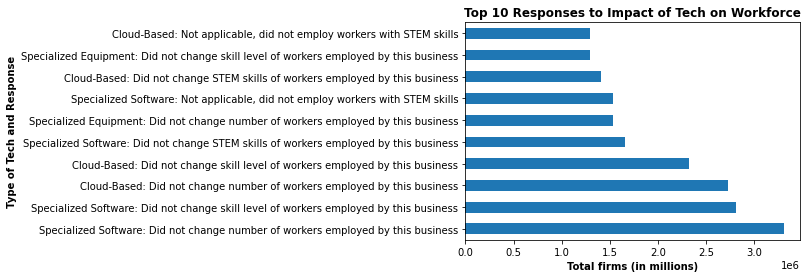

In [211]:
ax = state_top_10.plot(kind='barh',legend=False)
ax.set_xlabel('Total firms (in millions)', weight='bold')
ax.set_title('Top 10 Responses to Impact of Tech on Workforce',weight='bold')
ax.set_ylabel('Type of Tech and Response',weight='bold')

plt.show()

In [14]:
tech_use = df[['NAME','TECHUSE_LABEL','FIRMPDEMP','state']]
tech_use.head()

,NAME,TECHUSE_LABEL,FIRMPDEMP,state
0,Alabama,Cloud-Based: Total use,17448,01
1,Alabama,Cloud-Based: Total Reporting,58136,01
2,Alabama,Specialized Software: Did not use,30912,01
3,Alabama,"Specialized Software: Tested, but did not use ...",253,01
4,Alabama,Specialized Software: Low use,4191,01


In [29]:
cloud = tech_use.loc[tech_use['TECHUSE_LABEL'] == 'Cloud-Based: High use']['NAME']
#& (tech_use['NAME'] == 'Texas'
cloud


179       Alabama
329       Alabama
420       Alabama
646       Alabama
933       Alabama
           ...   
197354    Wyoming
197545    Wyoming
197717    Wyoming
197846    Wyoming
197970    Wyoming
Name: NAME, Length: 1071, dtype: object

In [60]:
cloud_list = ['Specialized Software: High use',
       'Robotics: High use', 
       'Artificial Intelligence: High use',
       'Specialized Equipment: High use',
       'Cloud-Based: High use']



In [ ]:
use_list = []
use_list = tech_use['TECHUSE_LABEL'].unique()
#tech_list = total_tech['TECHUSE_LABEL'].unique()
use_list

In [61]:
clouds = df[df["TECHUSE_LABEL"].isin(cloud_list)]

filtered_states_list = []
for i in range(len(clouds)):
    cloud_list.append(clouds.iloc[i,0])

clouds.head()

clouds_chart = clouds.drop(['NAICS2017','NAICS2017_LABEL','NSFSZFI','NSFSZFI_LABEL','ETH_GROUP','ETH_GROUP_LABEL','RACE_GROUP','RACE_GROUP_LABEL','FACTORS_U','FACTORS_U_LABEL','TECHUSE','MOTUSETECH','MOTUSETECH_LABEL'],axis=1)
clouds_chart.drop_duplicates(keep=False)
clouds_chart.head(20)

,NAME,TECHUSE_LABEL,FIRMPDEMP,IMPACTWF_U,IMPACTWF_U_LABEL,state
6,Alabama,Specialized Software: High use,10974,00,All firms,01
14,Alabama,Robotics: High use,443,00,All firms,01
171,Alabama,Artificial Intelligence: High use,356,00,All firms,01
179,Alabama,Cloud-Based: High use,5505,00,All firms,01
321,Alabama,Artificial Intelligence: High use,0,00,All firms,01
329,Alabama,Cloud-Based: High use,0,00,All firms,01
337,Alabama,Specialized Software: High use,0,00,All firms,01
363,Alabama,Robotics: High use,0,00,All firms,01
371,Alabama,Specialized Equipment: High use,0,00,All firms,01
405,Alabama,Artificial Intelligence: High use,0,00,All firms,01


In [62]:
clouds_chart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5355 entries, 6 to 198014
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              5355 non-null   object
 1   TECHUSE_LABEL     5355 non-null   object
 2   FIRMPDEMP         5355 non-null   int32 
 3   IMPACTWF_U        5355 non-null   object
 4   IMPACTWF_U_LABEL  5355 non-null   object
 5   state             5355 non-null   object
dtypes: int32(1), object(5)
memory usage: 271.9+ KB


In [63]:
cloudy = clouds_chart.loc[clouds_chart['TECHUSE_LABEL'] == 'Cloud-Based: High use']
cloudy

,NAME,TECHUSE_LABEL,FIRMPDEMP,IMPACTWF_U,IMPACTWF_U_LABEL,state
179,Alabama,Cloud-Based: High use,5505,00,All firms,01
329,Alabama,Cloud-Based: High use,0,00,All firms,01
420,Alabama,Cloud-Based: High use,0,00,All firms,01
646,Alabama,Cloud-Based: High use,0,00,All firms,01
933,Alabama,Cloud-Based: High use,307,00,All firms,01
...,...,...,...,...,...,...
197354,Wyoming,Cloud-Based: High use,0,00,All firms,56
197545,Wyoming,Cloud-Based: High use,0,00,All firms,56
197717,Wyoming,Cloud-Based: High use,362,00,All firms,56
197846,Wyoming,Cloud-Based: High use,0,00,All firms,56


In [64]:
cloud_grouped = cloudy.groupby(['NAME']).sum()
cloud_grouped.head(20)

,FIRMPDEMP
NAME,
Alabama,10844
Alaska,2245
Arizona,20845
Arkansas,7268
California,140866
Colorado,32146
Connecticut,11321
Delaware,4149
District of Columbia,3621


In [65]:
cloud_top_10 = cloud_grouped.nlargest(10,columns="FIRMPDEMP")
cloud_top_10

,FIRMPDEMP
NAME,
California,140866
Florida,86447
Texas,78758
New York,53999
Illinois,39859
Georgia,36973
North Carolina,36129
Pennsylvania,32851
Colorado,32146


In [72]:
type_tech = clouds_chart.groupby(['TECHUSE_LABEL','NAME']).sum()
type_tech.head()

FIRMPDEMP
TECHUSE_LABEL                     NAME                 
Artificial Intelligence: High use Alabama           356
                                  Alaska             62
                                  Arizona           567
                                  Arkansas          233
                                  California       5469

In [82]:
tech_state = type_tech.groupby(['TECHUSE_LABEL']).sum()
tech_state

,FIRMPDEMP
TECHUSE_LABEL,
Artificial Intelligence: High use,27477
Cloud-Based: High use,1037088
Robotics: High use,30817
Specialized Equipment: High use,531451
Specialized Software: High use,1680449


In [107]:
software_grouped = clouds_chart.loc[clouds_chart['TECHUSE_LABEL'] == 'Specialized Software: High use']
software_grouped = software_grouped.groupby('NAME').sum()
software_grouped.head(20)

,FIRMPDEMP
NAME,
Alabama,21813
Alaska,3975
Arizona,34204
Arkansas,13846
California,205752
Colorado,45916
Connecticut,19133
Delaware,5679
District of Columbia,3763


In [109]:
software_top_10 = software_grouped.nlargest(10,columns="FIRMPDEMP")
software_top_10

,FIRMPDEMP
NAME,
California,205752
Florida,132531
Texas,125759
New York,89920
Illinois,66675
Pennsylvania,58142
Georgia,56611
Ohio,53646
North Carolina,52950


In [ ]:
index = ['California','Florida','Texas','New York','Illinois','Pennsylvania','Georgia', 'Ohio','North Carolina','New Jersey','Colorado']
comparison = pd.DataFrame({'cloud-based': cloud_top_10, 'specialized software': software_top_10},index=index)
ax = comparison.plot.bar(rot=0,subplots=True)

In [118]:
pivot = pd.pivot_table(data = type_tech, index="NAME",columns=['TECHUSE_LABEL'],values="FIRMPDEMP")

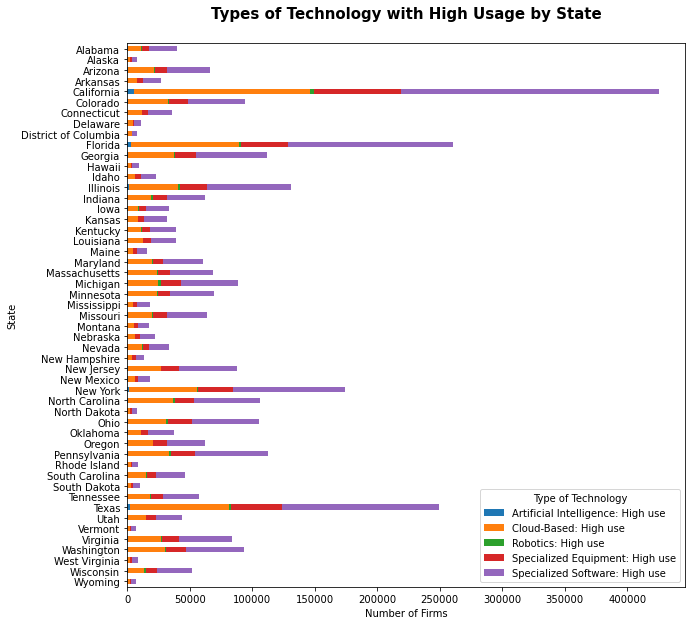

In [203]:
pivot = pivot.sort_values(['NAME'], ascending=False)
ax = pivot.plot.barh(stacked=True, figsize=(10,10))
ax.set_title('Types of Technology with High Usage by State', weight='bold',size=15,pad=25)
ax.set_xlabel('Number of Firms')
ax.set_ylabel('State')
ax.legend(title='Type of Technology')
plt.show()

In [ ]:
sort_tech_state = tech_state.sort_values(['FIRMPDEMP'],ascending=False)
ax = tech_state.plot(kind='bar')
ax.set_title('Technology Type and High Usage by Total Firms', fontsize=15)
ax.set_xlabel('Type of Tech')
ax.set_ylabel('Number of Firms(in millions)')
ax.legend(['Number'],prop={'size':0})


plt.show()

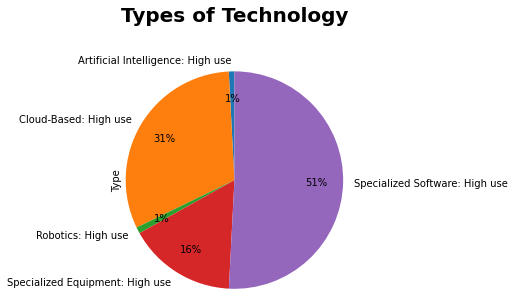

In [200]:

ax = tech_state.plot(kind='pie',startangle=90,legend=False,subplots=True,autopct='%1.0f%%', pctdistance = 0.75, radius=1.25,)
plt.title('Types of Technology',weight='bold',size=20,pad=50)
plt.ylabel('Type')
plt.yticks(pad=50)


#plt.legend(loc='lower left',fontsize=10)


#fig.set_facecolor('white')
plt.show()

In [219]:
low_list = ['Specialized Software: Low use','Artificial Intelligence: Low use',
       'Robotics: Low use', 
       'Specialized Equipment: Low use',
       'Cloud-Based: Low use']


In [220]:
lows = df[df["TECHUSE_LABEL"].isin(low_list)]

lows_list = []
for i in range(len(lows)):
    low_list.append(lows.iloc[i,0])

lows.head()

lows_chart = clouds.drop(['NAICS2017','NAICS2017_LABEL','NSFSZFI','NSFSZFI_LABEL','ETH_GROUP','ETH_GROUP_LABEL','RACE_GROUP','RACE_GROUP_LABEL','FACTORS_U','FACTORS_U_LABEL','TECHUSE','MOTUSETECH','MOTUSETECH_LABEL'],axis=1)
lows_chart.drop_duplicates(keep=False)
lows_chart.head(20)

,NAME,TECHUSE_LABEL,FIRMPDEMP,IMPACTWF_U,IMPACTWF_U_LABEL,state
6,Alabama,Specialized Software: High use,10974,00,All firms,01
14,Alabama,Robotics: High use,443,00,All firms,01
171,Alabama,Artificial Intelligence: High use,356,00,All firms,01
179,Alabama,Cloud-Based: High use,5505,00,All firms,01
321,Alabama,Artificial Intelligence: High use,0,00,All firms,01
329,Alabama,Cloud-Based: High use,0,00,All firms,01
337,Alabama,Specialized Software: High use,0,00,All firms,01
363,Alabama,Robotics: High use,0,00,All firms,01
371,Alabama,Specialized Equipment: High use,0,00,All firms,01
405,Alabama,Artificial Intelligence: High use,0,00,All firms,01


In [2]:
total_tech = df[['TECHUSE_LABEL','FIRMPDEMP']]
total_tech.head()

,TECHUSE_LABEL,FIRMPDEMP
0,Cloud-Based: Total use,17448
1,Cloud-Based: Total Reporting,58136
2,Specialized Software: Did not use,30912
3,"Specialized Software: Tested, but did not use ...",253
4,Specialized Software: Low use,4191


In [3]:
sorted_tech = total_tech.sort_values(['FIRMPDEMP'],ascending = False)
sorted_tech.head(20)

,TECHUSE_LABEL,FIRMPDEMP
190056,Robotics: Total Reporting,99980
189946,Cloud-Based: Total Reporting,99970
190064,Specialized Equipment: Total Reporting,99969
112130,Cloud-Based: Don't know,9994
17583,All firms,9994
179450,All firms,9990
101972,All firms,999
138675,All firms,999
99905,All firms,999
20504,All firms,999


In [4]:
tech_list = []
tech_list = sorted_tech['TECHUSE_LABEL'].unique()
tech_list

array(['Robotics: Total Reporting', 'Cloud-Based: Total Reporting',
       'Specialized Equipment: Total Reporting',
       "Cloud-Based: Don't know", 'All firms',
       'Artificial Intelligence: Did not use', 'Cloud-Based: Did not use',
       'Cloud-Based: Tested, but did not use in production or service',
       'Specialized Equipment: Total use',
       'Specialized Software: Did not use',
       'Specialized Software: High use',
       'Artificial Intelligence: Total Reporting',
       'Specialized Software: Total Reporting',
       "Artificial Intelligence: Don't know", 'Cloud-Based: Low use',
       'Robotics: Did not use', 'Cloud-Based: Total use',
       'Specialized Equipment: Moderate use',
       'Specialized Software: Total use',
       'Specialized Software: Moderate use',
       'Specialized Software: Low use',
       'Specialized Equipment: Did not use', 'Robotics: Total use',
       "Robotics: Don't know", 'Cloud-Based: Moderate use',
       'Specialized Equipment: Hi

In [5]:
tech_final_list =[
       'Robotics: Did not use', 'Artificial Intelligence: Did not use',
       'Specialized Equipment: Did not use', 'Cloud-Based: Did not use',
       'Specialized Software: Did not use',
       'Specialized Software: High use',
       'Specialized Software: Moderate use', 'Cloud-Based: Moderate use',
       'Cloud-Based: High use', 'Cloud-Based: Low use',
       'Specialized Software: Low use',
       'Specialized Equipment: Moderate use',
       "Specialized Software: Don't know", "Cloud-Based: Don't know",
       "Specialized Equipment: Don't know",
       "Artificial Intelligence: Don't know",
       'Specialized Equipment: High use',
       'Specialized Equipment: Low use', "Robotics: Don't know",
       'Artificial Intelligence: Low use',
       'Artificial Intelligence: Moderate use',
       'Cloud-Based: Tested, but did not use in production or service',
       'Robotics: Low use',
       'Specialized Software: Tested, but did not use in production or service',
       'Artificial Intelligence: Tested, but did not use in production or service',
       'Robotics: Moderate use', 'Artificial Intelligence: High use',
       'Specialized Equipment: Tested, but did not use in production or service',
       'Robotics: High use',
       'Robotics: Tested, but did not use in production or service']

In [16]:
tech = df[df["TECHUSE_LABEL"].isin(tech_final_list)]

tech_list = []
for i in range(len(tech)):
    tech_list.append(tech.iloc[i,0])

#tech.head()
tech_chart = tech.drop(['NAME','NAICS2017','NAICS2017_LABEL','NSFSZFI','NSFSZFI_LABEL','RACE_GROUP','RACE_GROUP_LABEL','FACTORS_U','FACTORS_U_LABEL','IMPACTWF_U','IMPACTWF_U_LABEL','ETH_GROUP','ETH_GROUP_LABEL','TECHUSE','MOTUSETECH','MOTUSETECH_LABEL','state'],axis=1)
tech_chart.drop_duplicates(keep=False)
tech_chart.head(20)

,TECHUSE_LABEL,FIRMPDEMP
2,Specialized Software: Did not use,30912
3,"Specialized Software: Tested, but did not use ...",253
4,Specialized Software: Low use,4191
5,Specialized Software: Moderate use,7449
6,Specialized Software: High use,10974
7,Specialized Software: Don't know,4056
10,Robotics: Did not use,53464
11,"Robotics: Tested, but did not use in productio...",89
12,Robotics: Low use,516
13,Robotics: Moderate use,755


In [17]:
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype('int')
tech_top = tech_chart.sort_values(['FIRMPDEMP'], ascending=False)
#tech_top.drop_duplicates(keep='last')

In [18]:
tech_grouped = tech_top.groupby(['TECHUSE_LABEL']).sum()
tech_grouped.head(20)

,FIRMPDEMP
TECHUSE_LABEL,
Artificial Intelligence: Did not use,8887478
Artificial Intelligence: Don't know,537653
Artificial Intelligence: High use,27477
Artificial Intelligence: Low use,150521
Artificial Intelligence: Moderate use,86569
"Artificial Intelligence: Tested, but did not use in production or service",40758
Cloud-Based: Did not use,5893836
Cloud-Based: Don't know,557546
Cloud-Based: High use,1037088


In [19]:
tech_top_10 = tech_grouped.nlargest(10, columns='FIRMPDEMP')
tech_top_10

,FIRMPDEMP
TECHUSE_LABEL,
Robotics: Did not use,9243536
Artificial Intelligence: Did not use,8887478
Specialized Equipment: Did not use,7460240
Cloud-Based: Did not use,5893836
Specialized Software: Did not use,5316481
Specialized Software: High use,1680449
Specialized Software: Moderate use,1325549
Cloud-Based: Moderate use,1178493
Cloud-Based: High use,1037088


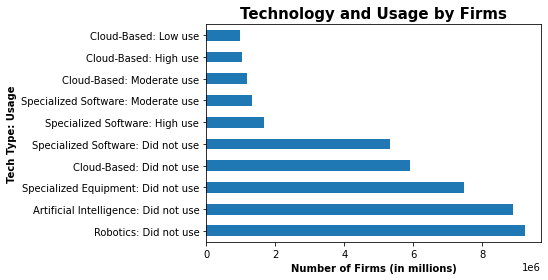

In [20]:
ax = tech_top_10.plot(kind ='barh',legend=False)
ax.set_title('Technology and Usage by Firms',weight='bold',size=15)
ax.set_xlabel('Number of Firms (in millions)',weight='bold')
ax.set_ylabel('Tech Type: Usage',weight='bold')

plt.show()